Import the libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
df=pd.read_csv("C:\\Users\\deepthi\\Downloads\\iris.csv")

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#check for null values
df.isnull()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [10]:
df.describe() #overall stastics of the dataframe

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.corr() #corelation

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


The range of each attribute differs from one another.Hence there requires normalize of the data
to prevent data leakage and  to improve the performance of the algorithm.

Before that Split the training and testing set from the dataset

In [18]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Choosing k-value:

k has to be odd and in general k is taken as 5

Two techniques for choosing best value of k:
k=round(sqrt(no_of_rows)) or Cross-validation

In [25]:
import math
k = round(math.sqrt(df.shape[0]))
if k%2==0:
    k = k-1
print(k)

11


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [31]:
y_pred = knn.predict(x_test)
print("Predicted value: ",y_pred)

Predicted value:  ['virginica' 'virginica' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa']


# Testing 

In [45]:
X_new = np.array([[3, 2, 4, 0.2]])
Y_pred = knn.predict(X_new)
print(Y_pred)

['virginica']


In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9


In [33]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
print("The Confusion matrix as follws:-")
print(Confusion_matrix)

The Confusion matrix as follws:-
[[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]


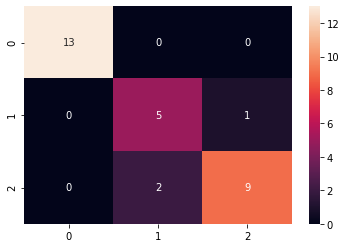

In [34]:
sns.heatmap(Confusion_matrix,annot=True)
plt.show()

In [35]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("Classification Report:-")
print(cr)

Classification Report:-
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.71      0.83      0.77         6
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.87      0.88      0.88        30
weighted avg       0.91      0.90      0.90        30

